### 04.2 梯度下降法
#### 4.2.2 梯度计算
$$
z_i = x_i \cdot w + b \tag{1}
$$
##### 计算z的梯度
 $$ \frac{\partial loss}{\partial z_i}=z_i - y_i \tag{3} $$
##### 计算 $w$ 的梯度
$$
\frac{\partial{loss}}{\partial{w}} = \frac{\partial{loss}}{\partial{z_i}}\frac{\partial{z_i}}{\partial{w}}=(z_i-y_i)x_i \tag{4}
$$

##### 计算 $b$ 的梯度

$$
\frac{\partial{loss}}{\partial{b}} = \frac{\partial{loss}}{\partial{z_i}}\frac{\partial{z_i}}{\partial{b}}=z_i-y_i \tag{5}
$$
#### 4.2.3 代码实现
初始化并读取数据

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from HelperClass.DataReader_1_0 import *
file_name = "ch04.npz"
reader = DataReader_1_0(file_name)
#读取数据
reader.ReadData()
X,Y = reader.GetWholeTrainSamples()
#学习率为0.1
eta = 0.1
#w,b的初始值为0
w, b = 0.0, 0.0
plot_w,plot_b = [w],[b]

开始迭代：

In [29]:
for i in range(reader.num_train):
    xi = X[i]
    yi = Y[i]
    #公式1
    #获取预测值zi
    zi = xi * w + b
    #公式3
    #计算z的梯度，预测值和实际值之间的差距
    dz = zi - yi
    #公式4
    #计算w的梯度
    dw = dz * xi
    #计算b的梯度
    db = dz
    #更新w和b
    w = w - eta * dw
    b = b - eta * db
    plot_w.append(w)
    plot_b.append(b)
print("w=", w)
print("b=", b)

w= [1.88238914]
b= [3.09774764]


画出下降的过程

Text(0, 0.5, 'Power of Air Conditioner(KW)')

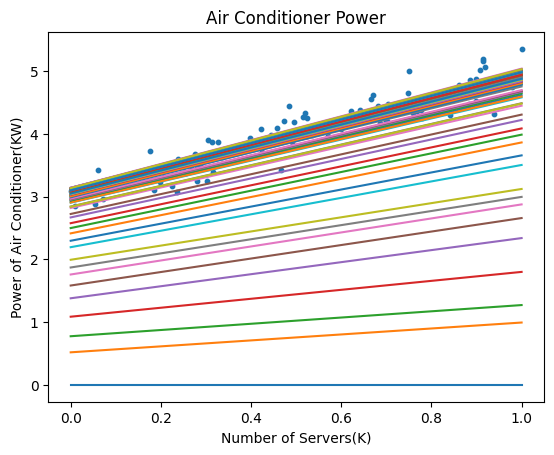

In [30]:
plot_x = np.linspace(0,1)
plt.scatter(X,Y,s=10)
for i in range(len(plot_w)):
    plot_y = plot_w[i]*plot_x + plot_b[i]
    plt.plot(plot_x,plot_y)
plt.title("Air Conditioner Power")
plt.xlabel("Number of Servers(K)")
plt.ylabel("Power of Air Conditioner(KW)")